<a href="https://colab.research.google.com/github/anurag-anand71994/Digit_Recognizer_Kaggle/blob/main/digit_kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = os.getcwd()
data_path = os.path.join(path , "drive","MyDrive","digit_kaggle")
print(data_path)

/content/drive/MyDrive/digit_kaggle


In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
"""The below command is to be used to unzip the training and testing data zip"""
#!unzip /content/drive/MyDrive/digit_kaggle/digit-recognizer.zip  -d /content/drive/MyDrive/digit_kaggle

'The below command is to be used to unzip the training and testing data zip'

In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/digit_kaggle/" + "train.csv")
test = pd.read_csv(r"/content/drive/MyDrive/digit_kaggle/" + "test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(train['label'])
plt.tight_layout();

NameError: ignored

In [ ]:
# Extract features
features = train.drop('label', axis=1)

# Extract label
y_train = train['label']

# Train images
X_ = np.array(features)
X_train = X_.reshape(X_.shape[0], 28, 28)

# Test images
X_test = np.array(test)

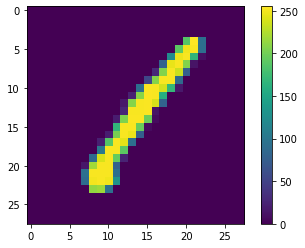

In [ ]:
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(X_train.shape, X_test.shape)

(42000, 28, 28) (28000, 784)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape , X_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [ ]:
X_train = X_train/255.
X_test = X_test/255.

X_train_val = X_train[38000 : ]
y_train_val = y_train[38000 : ]

X_train = X_train[:38000]
y_train = y_train[:38000]


In [ ]:
# 1. Create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(10) #10 is the number of classes
])

#2 Compile the model

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model

history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1188/1188 [==============================] - 4s 3ms/step - loss: 0.3027 - accuracy: 0.9128
Epoch 2/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.1316 - accuracy: 0.9621
Epoch 3/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0894 - accuracy: 0.9736
Epoch 4/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0673 - accuracy: 0.9795
Epoch 5/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 6/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0390 - accuracy: 0.9888
Epoch 7/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0311 - accuracy: 0.9909
Epoch 8/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0245 - accuracy: 0.9929
Epoch 9/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0207 - accuracy: 0.9938
Epoch 10/50
1188/1188 [==============================] - 3s 3ms/step - loss: 0.014

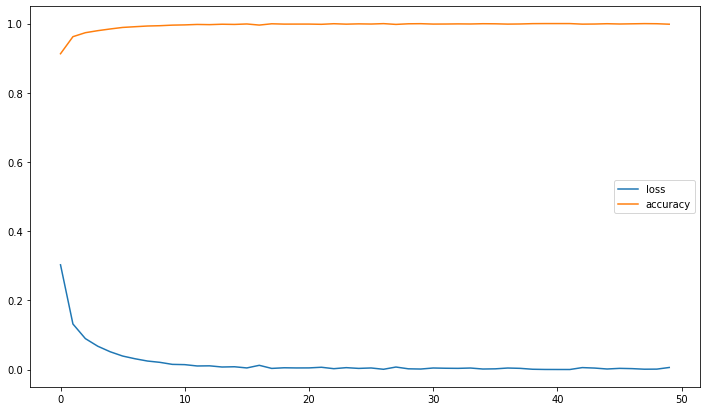

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,7))

In [ ]:
predictions = np.argmax(model.predict(X_train_val), axis=1)

In [ ]:
predictions

array([5, 7, 5, ..., 7, 6, 9])

In [ ]:
print(metrics.classification_report(y_train_val, predictions, digits=10))

              precision    recall  f1-score   support

           0  0.9750000000 0.9976744186 0.9862068966       430
           1  0.9711751663 0.9909502262 0.9809630459       442
           2  0.9807692308 0.9596774194 0.9701086957       372
           3  0.9854721550 0.9667458432 0.9760191847       421
           4  0.9809523810 0.9763033175 0.9786223278       422
           5  0.9846153846 0.9580838323 0.9711684370       334
           6  0.9636803874 0.9950000000 0.9790897909       400
           7  0.9800995025 0.9825436409 0.9813200498       401
           8  0.9673024523 0.9366754617 0.9517426273       379
           9  0.9629629630 0.9774436090 0.9701492537       399

    accuracy                      0.9750000000      4000
   macro avg  0.9752029623 0.9741097769 0.9745390309      4000
weighted avg  0.9750961762 0.9750000000 0.9749333220      4000



In [ ]:
datagen = ImageDataGenerator(rotation_range=20,
                  width_shift_range=0.20,
                  shear_range=15,
                  zoom_range=0.10,
                  validation_split=0,
                  horizontal_flip=False)


In [ ]:
datagen.fit(X_train)
generator_train  = datagen.flow(X_train,y_train,batch_size=256)
#generator_validation  = datagen.flow(X,y,batch_size=64,subset='validation')

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(10) #10 is the number of classes
])

#2 Compile the model

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model

history = model.fit(generator_train.x, generator_train.y, epochs=100,)

Epoch 1/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.2991 - accuracy: 0.9162
Epoch 2/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.1360 - accuracy: 0.9607
Epoch 3/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0910 - accuracy: 0.9733
Epoch 4/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 5/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0514 - accuracy: 0.9847
Epoch 6/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0401 - accuracy: 0.9881
Epoch 7/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0311 - accuracy: 0.9908
Epoch 8/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 9/100
1188/1188 [==============================] - 3s 3ms/step - loss: 0.0191 - accuracy: 0.9949
Epoch 10/100
1188/1188 [==============================] - 3s 3ms/step - l

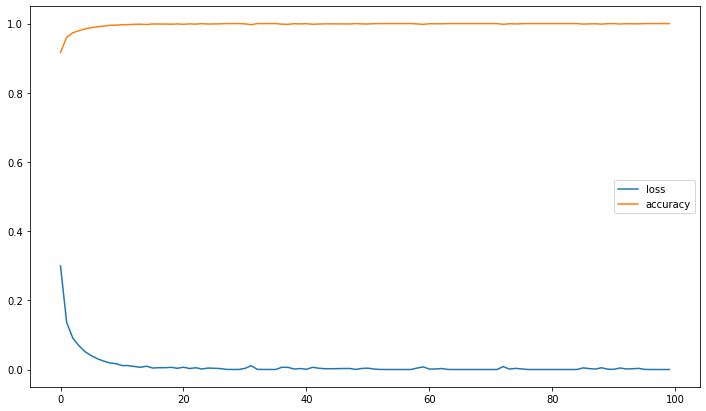

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,7))

In [ ]:
predictions = np.argmax(model.predict(X_train_val), axis=1)
print(metrics.classification_report(y_train_val, predictions, digits=10))

              precision    recall  f1-score   support

           0  0.9839080460 0.9953488372 0.9895953757       430
           1  0.9842696629 0.9909502262 0.9875986471       442
           2  0.9809264305 0.9677419355 0.9742895805       372
           3  0.9878345499 0.9643705463 0.9759615385       421
           4  0.9764150943 0.9810426540 0.9787234043       422
           5  0.9817073171 0.9640718563 0.9728096677       334
           6  0.9850374065 0.9875000000 0.9862671660       400
           7  0.9851485149 0.9925187032 0.9888198758       401
           8  0.9507772021 0.9683377309 0.9594771242       379
           9  0.9774436090 0.9774436090 0.9774436090       399

    accuracy                      0.9795000000      4000
   macro avg  0.9793467833 0.9789326099 0.9790985989      4000
weighted avg  0.9795630297 0.9795000000 0.9794913294      4000



In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
input_shape = (28,28,1)
input_layer = Input(input_shape)
layer = Conv2D(32,(5,5),activation = tf.nn.relu, padding='same', input_shape = input_shape)(input_layer)
layer = MaxPool2D((2,2))(layer)
layer = Conv2D(64,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = Conv2D(64,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = MaxPool2D((2,2))(layer)
layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = MaxPool2D((2,2))(layer)



flatten = Flatten()(layer)

layer = Dense(512,activation = tf.nn.relu)(flatten)
layer = Dropout(0.25)(layer)
layer = Dense(512,activation = tf.nn.relu)(layer)
layer  = Dropout(0.25)(layer)
layer = Dense(512,activation = tf.nn.relu)(layer)
layer  = Dropout(0.25)(layer)
output_layer = Dense(10, activation = tf.nn.softmax)(layer)
model = Model(input_layer,output_layer)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,optimizer='Adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)         7385

In [ ]:
history = model.fit(generator_train.x, generator_train.y, epochs=100, batch_size=16)

Epoch 1/100
2375/2375 [==============================] - 21s 9ms/step - loss: 2.3324 - accuracy: 0.1267
Epoch 2/100
2375/2375 [==============================] - 20s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 3/100
2375/2375 [==============================] - 20s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 4/100
2375/2375 [==============================] - 20s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 5/100
2375/2375 [==============================] - 20s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 6/100
2375/2375 [==============================] - 21s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 7/100
2375/2375 [==============================] - 21s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 8/100
2375/2375 [==============================] - 21s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 9/100
2375/2375 [==============================] - 21s 9ms/step - loss: 2.3577 - accuracy: 0.1034
Epoch 10/100
2375/2375 [==============================] - 20s 9m

KeyboardInterrupt: ignored

In [ ]:
predictions = np.argmax(model.predict(X_train_val), axis=1)
print(metrics.classification_report(y_train_val, predictions, digits=10))

              precision    recall  f1-score   support

           0  0.0000000000 0.0000000000 0.0000000000       430
           1  0.0000000000 0.0000000000 0.0000000000       442
           2  0.0000000000 0.0000000000 0.0000000000       372
           3  0.0000000000 0.0000000000 0.0000000000       421
           4  0.0000000000 0.0000000000 0.0000000000       422
           5  0.0835000000 1.0000000000 0.1541301338       334
           6  0.0000000000 0.0000000000 0.0000000000       400
           7  0.0000000000 0.0000000000 0.0000000000       401
           8  0.0000000000 0.0000000000 0.0000000000       379
           9  0.0000000000 0.0000000000 0.0000000000       399

    accuracy                      0.0835000000      4000
   macro avg  0.0083500000 0.1000000000 0.0154130134      4000
weighted avg  0.0069722500 0.0835000000 0.0128698662      4000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
input_shape = (28,28,1)
input_layer = Input(input_shape)

layer11 = Conv2D(16,(1,1),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 28*28
layer12 = Conv2D(16,(3,3),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 26*26
layer13 = Conv2D(16,(5,5),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 24*24
layer14 = Conv2D(16,(7,7),activation = tf.nn.relu, input_shape = input_shape)(input_layer)  #op 22*22

layer21 = MaxPool2D((2,2))(layer11)  #14
layer22 = MaxPool2D((2,2))(layer12)  #13
layer23 = MaxPool2D((2,2))(layer13)  #12
layer24 = MaxPool2D((2,2))(layer14)  #11

layer31 = Conv2D(32,(5,5),activation = tf.nn.relu)(layer21) #10
layer32 = Conv2D(32,(3,3),activation = tf.nn.relu)(layer22) #11
layer33 = Conv2D(32,(3,3),activation = tf.nn.relu)(layer23) #10
layer34 = Conv2D(32,(1,1),activation = tf.nn.relu)(layer24) #11

layer41 = MaxPool2D((2,2))(layer31)
layer42 = MaxPool2D((2,2))(layer32)
layer43 = MaxPool2D((2,2))(layer33)
layer44 = MaxPool2D((2,2))(layer34)

flatten51 = Flatten()(layer41)
flatten52 = Flatten()(layer42)
flatten53 = Flatten()(layer43)
flatten54 = Flatten()(layer44)

layer61 = Dense(128,activation = tf.nn.relu)(flatten51)
layer62 = Dense(128,activation = tf.nn.relu)(flatten52)
layer63 = Dense(128,activation = tf.nn.relu)(flatten53)
layer64 = Dense(128,activation = tf.nn.relu)(flatten54)

layer71 = tf.keras.layers.concatenate([layer61 , layer61 , layer63 , layer64],axis=1)

output_layer = Dense(10, activation = tf.nn.softmax)(layer71)

model = Model(input_layer,output_layer)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,optimizer='Adam', metrics = ['accuracy'])

# layer = Conv2D(64,(3,3),activation = tf.nn.relu, padding='same')(layer)
# layer = Conv2D(64,(3,3),activation = tf.nn.relu, padding='same')(layer)
# layer = MaxPool2D((2,2))(layer)
# layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
# layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
# layer = Conv2D(128,(3,3),activation = tf.nn.relu, padding='same')(layer)
# layer = MaxPool2D((2,2))(layer)



# flatten = Flatten()(layer)

# layer = Dense(512,activation = tf.nn.relu)(flatten)
# layer = Dropout(0.25)(layer)
# layer = Dense(512,activation = tf.nn.relu)(layer)
# layer  = Dropout(0.25)(layer)
# layer = Dense(512,activation = tf.nn.relu)(layer)
# layer  = Dropout(0.25)(layer)
# output_layer = Dense(10, activation = tf.nn.softmax)(layer)
# model = Model(input_layer,output_layer)

# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,optimizer='Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(generator_train.x, generator_train.y, epochs=100, batch_size=64)

Epoch 1/100
594/594 [==============================] - 6s 8ms/step - loss: 1.5647 - accuracy: 0.9077
Epoch 2/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4899 - accuracy: 0.9733
Epoch 3/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4818 - accuracy: 0.9805
Epoch 4/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4774 - accuracy: 0.9846
Epoch 5/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4747 - accuracy: 0.9871
Epoch 6/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4729 - accuracy: 0.9888
Epoch 7/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4719 - accuracy: 0.9896
Epoch 8/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4712 - accuracy: 0.9902
Epoch 9/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4697 - accuracy: 0.9918
Epoch 10/100
594/594 [==============================] - 5s 8ms/step - loss: 1.4693 - accura

In [ ]:
predictions = np.argmax(model.predict(X_train_val), axis=1)
print(metrics.classification_report(y_train_val, predictions, digits=10))

              precision    recall  f1-score   support

           0  0.9907407407 0.9953488372 0.9930394432       430
           1  0.9909502262 0.9909502262 0.9909502262       442
           2  0.9761273210 0.9892473118 0.9826435247       372
           3  0.9904761905 0.9881235154 0.9892984542       421
           4  0.9836448598 0.9976303318 0.9905882353       422
           5  0.9538904899 0.9910179641 0.9720998532       334
           6  0.9875930521 0.9950000000 0.9912826899       400
           7  0.9900497512 0.9925187032 0.9912826899       401
           8  0.9918256131 0.9604221636 0.9758713137       379
           9  1.0000000000 0.9573934837 0.9782330346       399

    accuracy                      0.9860000000      4000
   macro avg  0.9855298245 0.9857652537 0.9855289465      4000
weighted avg  0.9861937478 0.9860000000 0.9859855576      4000



In [ ]:
datagen.fit(X_train)
generator_train  = datagen.flow(X_train,y_train,batch_size=256)


In [ ]:
history = model.fit(generator_train.x, generator_train.y, epochs=100, batch_size=64)

Epoch 1/100
657/657 [==============================] - 7s 9ms/step - loss: 1.5838 - accuracy: 0.8874
Epoch 2/100
657/657 [==============================] - 6s 9ms/step - loss: 1.4872 - accuracy: 0.9758
Epoch 3/100
657/657 [==============================] - 6s 8ms/step - loss: 1.4797 - accuracy: 0.9825
Epoch 4/100
657/657 [==============================] - 6s 9ms/step - loss: 1.4761 - accuracy: 0.9861
Epoch 5/100
657/657 [==============================] - 6s 8ms/step - loss: 1.4736 - accuracy: 0.9883
Epoch 6/100
657/657 [==============================] - 5s 8ms/step - loss: 1.4724 - accuracy: 0.9892
Epoch 7/100
657/657 [==============================] - 5s 8ms/step - loss: 1.4705 - accuracy: 0.9910
Epoch 8/100
657/657 [==============================] - 5s 8ms/step - loss: 1.4708 - accuracy: 0.9907
Epoch 9/100
657/657 [==============================] - 5s 8ms/step - loss: 1.4702 - accuracy: 0.9911
Epoch 10/100
657/657 [==============================] - 5s 8ms/step - loss: 1.4700 - accura

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [ ]:
len(predictions)

28000

In [ ]:
predictions[:100]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4])

In [ ]:
[i for i in range(1,10 + 1)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
import pandas as pd
opdf = pd.DataFrame() 
opdf["ImageId"] = [i for i in range(1 , len(predictions)+1 )]
opdf["Label"] = predictions
opdf.to_csv(r"/content/drive/MyDrive/digit_kaggle/" + "submission1.csv")

In [ ]:
#model_hist = model.fit(generator_train,validation_data=(X_train_val , y_train_val),epochs=100,verbose=1,batch_size=32)  #this works fine just not using for now